### MLOps. Практическое задание №5 (vo_HW)

#### Цель задания

Применить средства автоматизации тестирования python для автоматического тестирования качества работы модели машинного обучения на различных датасетах.

In [1]:
import pickle

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import mplcyberpunk

#### Содержание задания

1. Создать три датасета с «качественными данными», на которых можно обучить простую модель линейной регрессии:

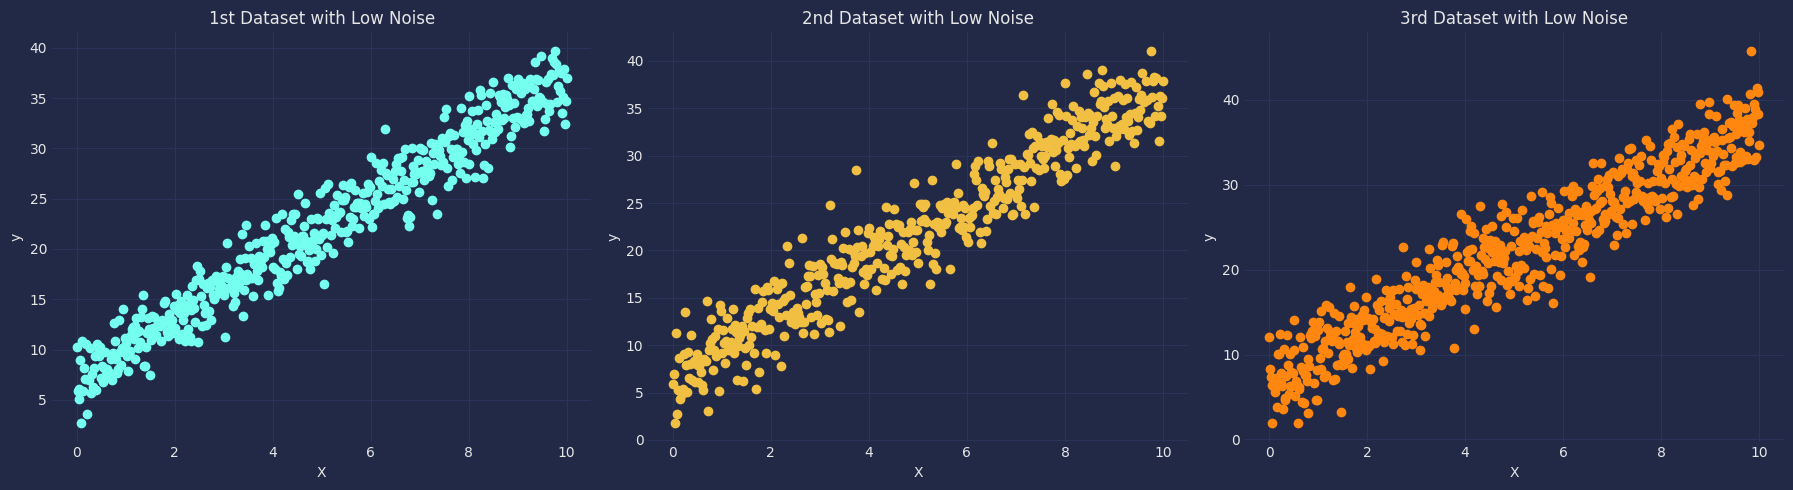

In [2]:
# Base function to generate a linear relationship
def base_linear_relationship(X):
    return 3 * X + 7  # y = 3x + 7


def generate_dataset(n_samples, noise_scale, seed):
    np.random.seed(seed)
    X = np.linspace(0, 10, n_samples)
    noise = np.random.normal(0, noise_scale, n_samples)  # Randomized noise
    y = base_linear_relationship(X) + noise
    return X, y


# Generate datasets
X_one_low_noise, y_one_low_noise = generate_dataset(500, 2.0, 1)
X_two_low_noise, y_two_low_noise = generate_dataset(450, 2.5, 2)
X_three_low_noise, y_three_low_noise = generate_dataset(600, 2.8, 3)


# Plot datasets
plt.style.use("cyberpunk")
plt.figure(figsize=(24, 5))

plt.subplot(1, 4, 1)
plt.scatter(X_one_low_noise, y_one_low_noise, color='#75ffef')
plt.title('1st Dataset with Low Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 4, 2)
plt.scatter(X_two_low_noise, y_two_low_noise, color='#f1bf42')
plt.title('2nd Dataset with Low Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 4, 3)
plt.scatter(X_three_low_noise, y_three_low_noise, color='#ff870f')
plt.title('3rd Dataset with Low Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

2. На одном из этих датасетов обучить модель линейной регрессии:

Intercept: 7.159725273060946
Coefficient: 2.989429703090334


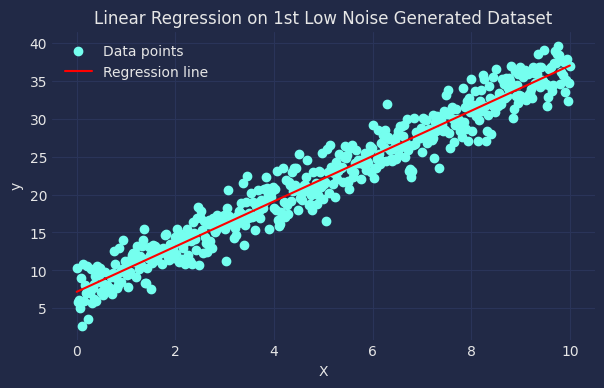

In [3]:
# Train a linear regression model on the first dataset
model = LinearRegression()
X_one_low_noise_reshaped = X_one_low_noise.reshape(-1, 1)  # Reshape for sklearn
model.fit(X_one_low_noise_reshaped, y_one_low_noise)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Save the model to a pickle file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Plot the first dataset and the regression line
plt.style.use("cyberpunk")
plt.figure(figsize=(7, 4))
plt.scatter(X_one_low_noise, y_one_low_noise, color='#75ffef', label='Data points')
plt.plot(X_one_low_noise, model.predict(X_one_low_noise_reshaped), color='red', label='Regression line')
plt.title('Linear Regression on 1st Low Noise Generated Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3. Создать датасет с шумом в данных:

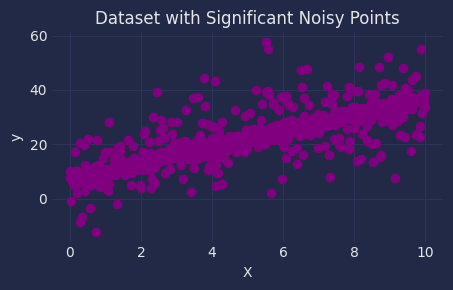

In [4]:
# Method 4: Generating a dataset with a significant group of noisy points modeled after Method 3
def generate_noisy_dataset(n_samples=800, noise_fraction=0.3, noise_magnitude=10):
    np.random.seed(3)  # Same seed as Dataset 3 for consistency
    X = np.linspace(0, 10, n_samples)
    y = base_linear_relationship(X) + np.random.normal(0, 1.7, n_samples)  # Base noise
    
    # Introduce additional noise to a fraction of the points
    num_noisy_points = int(n_samples * noise_fraction)
    noisy_indices = np.random.choice(n_samples, num_noisy_points, replace=False)
    noise = np.random.normal(0, noise_magnitude, num_noisy_points)
    y[noisy_indices] += noise  # Add significant noise to selected points
    
    return X, y


X_noisy, y_noisy = generate_noisy_dataset()

# Plot dataset
plt.style.use("cyberpunk")
plt.figure(figsize=(18, 3))
plt.subplot(1, 4, 4)
plt.scatter(X_noisy, y_noisy, color='purple')
plt.title('Dataset with Significant Noisy Points')
plt.xlabel('X')
plt.ylabel('y')
plt.tight_layout()
plt.show()

4. Провести тестирование работы модели на разных датасетах с использованием Pytest, анализируя качество предсказания, обнаружить проблему на датасете с шумами.

In [5]:
# Function to save dataset to a CSV file
def save_dataset_to_csv(X, y, filename):
    df = pd.DataFrame({'X': X, 'y': y})
    df.to_csv(filename, index=False)
    print(f"{filename} saved!")

In [6]:
# Save the datasets to CSV files
save_dataset_to_csv(X_one_low_noise, y_one_low_noise, 'dataset_one_little_noise.csv')
save_dataset_to_csv(X_two_low_noise, y_two_low_noise, 'dataset_two_little_noise.csv')
save_dataset_to_csv(X_three_low_noise, y_three_low_noise, 'dataset_three_little_noise.csv')
save_dataset_to_csv(X_noisy, y_noisy, 'dataset_noisy.csv')

dataset_one_little_noise.csv saved!
dataset_two_little_noise.csv saved!
dataset_three_little_noise.csv saved!
dataset_noisy.csv saved!


In [7]:
%%writefile test_linear_regression.py
import os
import pickle
import pytest
import pandas as pd
from sklearn.metrics import r2_score


# Function to load dataset from a CSV file
def load_dataset_from_csv(filename):
    df = pd.read_csv(filename)
    X = df['X'].values.reshape(-1, 1)
    y = df['y'].values
    return X, y


# Function to load the trained model from the pickle file
def load_model(pickle_filename):
    with open(pickle_filename, 'rb') as file:
        model = pickle.load(file)
    return model


# Test function to calculate the R² score for each dataset
@pytest.mark.parametrize("dataset_filename", [
    'dataset_one_little_noise.csv',
    'dataset_two_little_noise.csv',
    'dataset_three_little_noise.csv',
    'dataset_noisy.csv'
])
def test_r2_score(dataset_filename):
    model = load_model('linear_regression_model.pkl')
    X, y = load_dataset_from_csv(dataset_filename)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)
    print(f"R² score for {dataset_filename}: {score}")
    assert score > 0.8, f"R² score is too low for {dataset_filename}: {score}"


# Run the tests
if __name__ == "__main__":
    pytest.main([__file__])


Overwriting test_linear_regression.py


In [8]:
!pytest -v test_linear_regression.py

============================= test session starts ==============================
platform linux -- Python 3.11.2, pytest-8.2.1, pluggy-1.5.0 -- /home/debuser/projects/mlops-5/.venv/bin/python
cachedir: .pytest_cache
rootdir: /home/debuser/projects/mlops-5
configfile: pyproject.toml
plugins: anyio-4.4.0
collected 4 items                                                              

test_linear_regression.py::test_r2_score[dataset_one_little_noise.csv] PASSED [ 25%]
test_linear_regression.py::test_r2_score[dataset_two_little_noise.csv] PASSED [ 50%]
test_linear_regression.py::test_r2_score[dataset_three_little_noise.csv] PASSED [ 75%]
test_linear_regression.py::test_r2_score[dataset_noisy.csv] FAILED       [100%]

=================================== FAILURES ===================================
_______________________ test_r2_score[dataset_noisy.csv] _______________________

dataset_filename = 'dataset_noisy.csv'

    @pytest.mark.parametrize("dataset_filename", [
        'dataset_one_li